In [65]:
import importlib
import plotting as plotting
import data_processing as data_processing
importlib.reload(plotting)
importlib.reload(data_processing)

from plotting import plot_loss, plot_error_bars, plot_h6_stepwise
from data_processing import compute_stats, extract_final_metrics
import json

import pandas as pd

# overall

In [66]:
# --- Load JSON file ---
with open("../outputs/output_mlp.json", "r") as f:
    output_mlp = json.load(f)

with open("../outputs/output_all_models.json", "r") as f:
    output_all_models = json.load(f)

In [67]:
combined_outputs = {
    **output_mlp,          # adds "MLP"
    **output_all_models,  # adds "RNN", "LSTM", "GRU", etc.
}

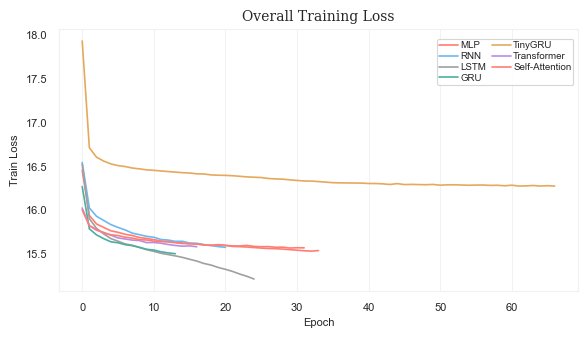

In [69]:
plot_loss(combined_outputs, title="Overall Training Loss")

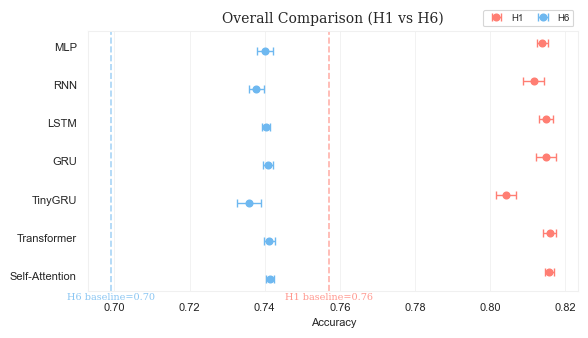

In [70]:
plot_error_bars(combined_outputs, title="Overall Comparison (H1 vs H6)", baseline=[0.757, 0.699])

In [71]:
final_all = extract_final_metrics(combined_outputs)
baseline_all = {
    "model": "Baseline",
    "acc_overall": 0.728,
    "acc_h1": 0.757,
    "acc_h6": 0.699
}

final_all = pd.concat([final_all, pd.DataFrame([baseline_all])], ignore_index=True)

print(final_all)


            model  acc_overall    acc_h1    acc_h6
0             MLP     0.775828  0.813507  0.738262
1             RNN     0.774132  0.808704  0.739664
2            LSTM     0.777729  0.814385  0.741182
3             GRU     0.777700  0.815967  0.739547
4         TinyGRU     0.770301  0.806185  0.734525
5     Transformer     0.778723  0.816962  0.740598
6  Self-Attention     0.779425  0.816611  0.742350
7        Baseline     0.728000  0.757000  0.699000


In [72]:
out_all = compute_stats(final_all)


===== Horizon Condition Accuracy Stats =====
H1 mean accuracy = 0.806  (95% CI [0.792, 0.820])
H6 mean accuracy = 0.734  (95% CI [0.724, 0.744])

Paired t-test (H1 vs H6):
  t = 33.301,  two-sided p = 0.00000
  One-sided p (H1 > H6) = 0.00000



# first trial

In [73]:
# --- Load JSON file ---
with open("../outputs/output_mlp_first_trial.json", "r") as f:
    output_mlp_first_trial = json.load(f)

with open("../outputs/output_first_trial.json", "r") as f:
    output_first_trial = json.load(f)

In [74]:
combined_first_trial = {
    **output_mlp_first_trial,          # adds "MLP"
    **output_first_trial,  # adds "RNN", "LSTM", "GRU", etc.
}

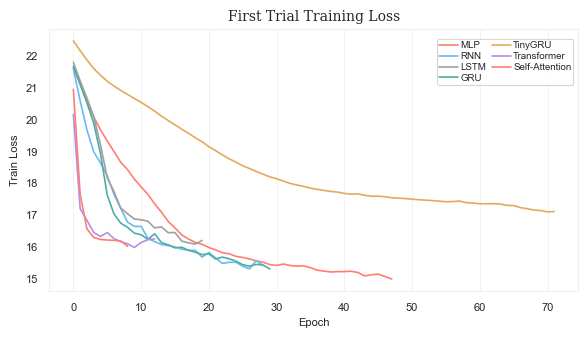

In [75]:
plot_loss(combined_first_trial, title="First Trial Training Loss")

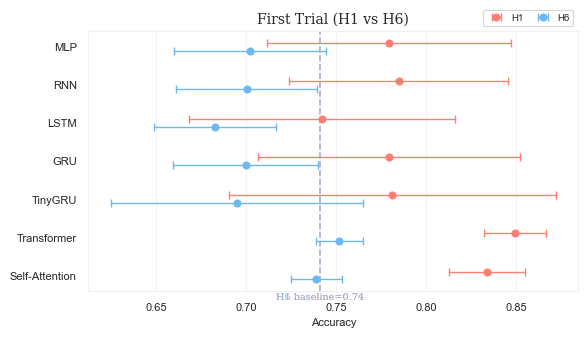

In [76]:
plot_error_bars(combined_first_trial, title="First Trial (H1 vs H6)", baseline=[0.741, 0.741])

In [26]:
final_first = extract_final_metrics(combined_first_trial)
baseline_first = {
    "model": "Baseline",
    "acc_overall": 0.741,
    "acc_h1": 0.741,
    "acc_h6": 0.741
}

final_first = pd.concat([final_first, pd.DataFrame([baseline_first])], ignore_index=True)
out_first = compute_stats(final_first)


===== Horizon Condition Accuracy Stats =====
H1 mean accuracy = 0.823  (95% CI [0.796, 0.849])
H6 mean accuracy = 0.735  (95% CI [0.725, 0.745])

Paired t-test (H1 vs H6):
  t = 6.133,  two-sided p = 0.00048
  One-sided p (H1 > H6) = 0.00024



# individual

In [77]:
with open("../outputs/output_individual.json", "r") as f:
    output_individual = json.load(f)

with open("../outputs/output_mlp_individual.json", "r") as f:
    output_mlp_individual = json.load(f)

In [78]:
combined_individual = {
    **output_mlp_individual,          # adds "MLP"
    **output_individual,  # adds "RNN", "LSTM", "GRU", etc.
}

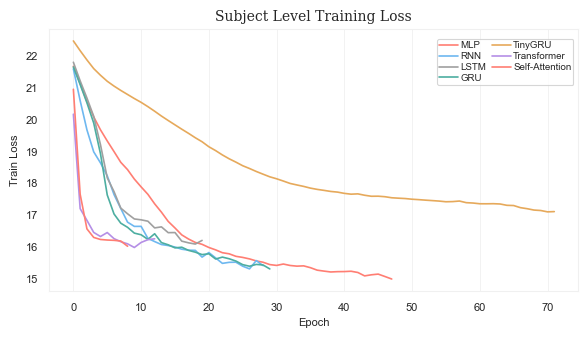

In [79]:
plot_loss(combined_first_trial, title="Subject Level Training Loss")

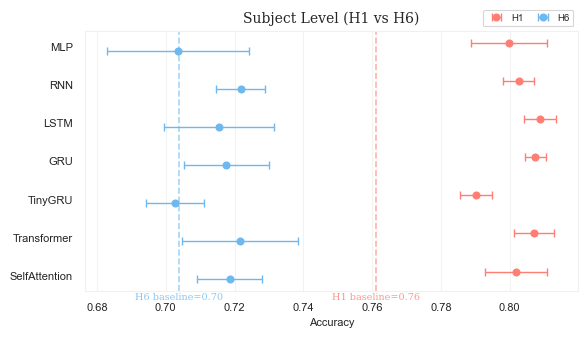

In [80]:
plot_error_bars(combined_individual, title="Subject Level (H1 vs H6)", baseline=[0.761, 0.704])

In [30]:
final_subject = extract_final_metrics(combined_individual)
baseline_subject = {
    "model": "Baseline",
    "acc_overall": 0.733,
    "acc_h1": 0.761,
    "acc_h6": 0.704
}

final_subject = pd.concat([final_subject, pd.DataFrame([baseline_subject])], ignore_index=True)
out_subject = compute_stats(final_subject)


===== Horizon Condition Accuracy Stats =====
H1 mean accuracy = 0.792  (95% CI [0.782, 0.801])
H6 mean accuracy = 0.697  (95% CI [0.688, 0.707])

Paired t-test (H1 vs H6):
  t = 14.171,  two-sided p = 0.00000
  One-sided p (H1 > H6) = 0.00000



# cross game

In [81]:
with open("../outputs/output_cross_games.json", "r") as f:
    output_cross_games = json.load(f)

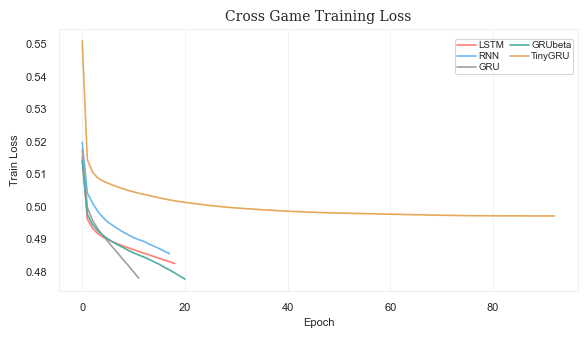

In [82]:
plot_loss(output_cross_games, title="Cross Game Training Loss")

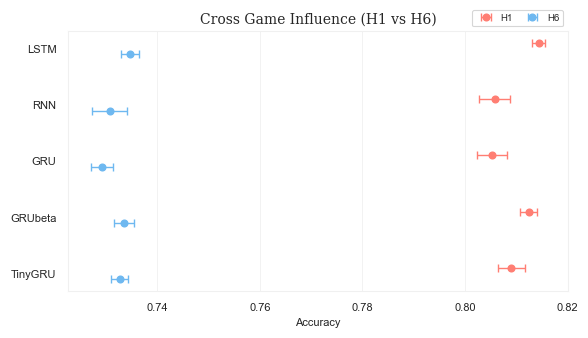

In [83]:
plot_error_bars(output_cross_games, title="Cross Game Influence (H1 vs H6)")

In [84]:
final_cross = extract_final_metrics(output_cross_games)
out_cross = compute_stats(final_cross)


===== Horizon Condition Accuracy Stats =====
H1 mean accuracy = 0.809  (95% CI [0.804, 0.813])
H6 mean accuracy = 0.733  (95% CI [0.730, 0.735])

Paired t-test (H1 vs H6):
  t = 55.142,  two-sided p = 0.00000
  One-sided p (H1 > H6) = 0.00000



# later trials

In [65]:
with open("../outputs/later_trials_history.json", "r") as f:
    later_trials_history = json.load(f)

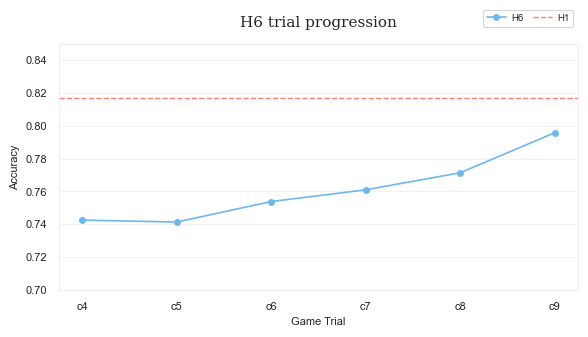

In [66]:
plot_h6_stepwise(later_trials_history)